In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [13]:
mdp = Walk1D()
b = RandomBandit(mdp)
solver = ModularSolver(mdp, b; n_iterations=1200)
policy = solve(solver, mdp);

In [14]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [15]:
hr = HistoryRecorder(; rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

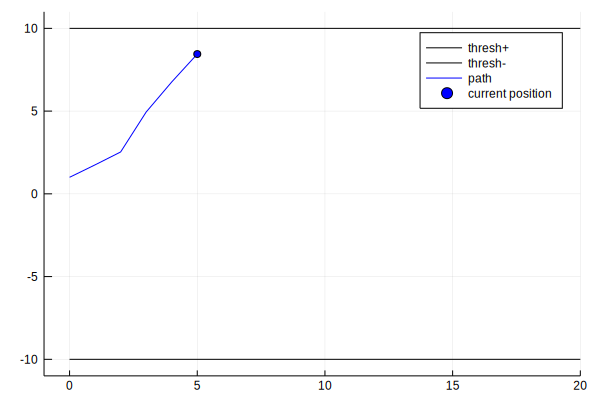

In [16]:
plot(mdp, h)

In [17]:
sum(h.reward_hist)

-13.293023994592168

## CBTSObserver

In [18]:
mdp = Walk1D()
observer = AQObserver(1)
b = RandomBandit(mdp; observer=observer)
solver = ModularSolver(mdp, b; n_iterations=1200)
policy = solve(solver, mdp);

In [19]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(0.752705061897954, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 1200),Pair{Symbol,Any}(:search_time_us, 0x000000000002e4ea),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(0, 1.0)], Any[0.000417115], -0.918939, Any[], Any[], 0.0, 1.0, 1.0))))

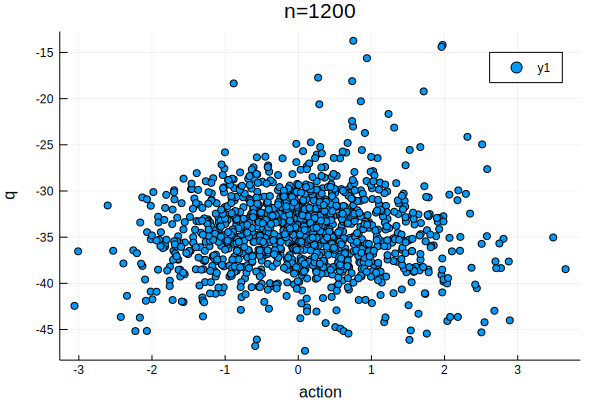

In [22]:
plot(observer, 1200)

In [21]:
animate(observer; fps=4, ylim=(-45.0,-12.0))

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [11]:
observer.Xs[10]

10-element Array{Float64,1}:
  0.679107
 -0.117138
  0.481556
 -0.482604
 -0.528431
 -0.682832
 -1.6413  
  1.73706 
 -0.614377
  0.506347

In [12]:
observer.ys[5]

5-element Array{Float64,1}:
 -37.0664
 -29.4102
 -31.3682
 -37.0801
 -35.4113